# Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly as py
from plotly import graph_objects as go
from plotly import express as px
import seaborn as sns

import os
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_full = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/full_data.csv', sep = ';')
df_full.head(10)

,Data_Hora,LocalMax_d_All,LocalMax_d_ow,Local_d_Null,LocalMax_h_All,LocalMax_h_ow,Local_h_Null,Local,UmidadeRelativa,PressaoAtmosferica,...,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao,LocalMax_d,LocalMax_h,Local_d,Local_h
0,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,Camilopolis,84.8,920.6,...,22.8,17.5,0.0,137.0,1.5,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,RM,86.6,926.7,...,23.3,17.8,0.0,131.0,2.5,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,Paraiso,92.3,919.1,...,22.7,18.0,0.0,101.0,2.6,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,Erasmo,88.8,920.5,...,22.9,17.7,0.0,133.0,0.7,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,Vitoria,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,Camilopolis,84.1,920.3,...,22.8,17.4,0.0,76.0,1.9,0.0,0.0,0.0,0.0,0.0
6,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,RM,85.9,926.4,...,23.4,17.7,0.0,154.0,2.7,0.0,0.0,0.0,0.0,0.0
7,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,Paraiso,90.4,918.9,...,22.6,17.7,0.0,115.0,3.4,0.2,0.0,0.0,0.0,0.0
8,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,Vitoria,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,Erasmo,87.2,920.3,...,22.8,17.4,0.0,96.0,3.6,0.0,0.0,0.0,0.0,0.0


In [3]:
#df_prep = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/prepped_data.csv', sep = ';')
#df_prep.head()

# Data adjusts

In [4]:
df_full['Data_Hora'] = pd.to_datetime(df_full['Data_Hora'], yearfirst=True)

In [5]:
estacoes = {
    'Camilopolis': 1,
    'Erasmo': 2,
    'Paraiso': 3,
    'RM': 4,
    'Vitoria': 5
}

In [6]:
df = df_full.replace(estacoes)
df['Mes'] = df['Data_Hora'].dt.month
df.head(10)

,Data_Hora,LocalMax_d_All,LocalMax_d_ow,Local_d_Null,LocalMax_h_All,LocalMax_h_ow,Local_h_Null,Local,UmidadeRelativa,PressaoAtmosferica,...,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao,LocalMax_d,LocalMax_h,Local_d,Local_h,Mes
0,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1,84.8,920.6,...,17.5,0.0,137.0,1.5,0.0,0.0,0.0,0.0,0.0,1
1,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4,86.6,926.7,...,17.8,0.0,131.0,2.5,0.0,0.0,0.0,0.0,0.0,1
2,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,3,92.3,919.1,...,18.0,0.0,101.0,2.6,0.0,0.0,0.0,0.0,0.0,1
3,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,2,88.8,920.5,...,17.7,0.0,133.0,0.7,0.0,0.0,0.0,0.0,0.0,1
4,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,1,84.1,920.3,...,17.4,0.0,76.0,1.9,0.0,0.0,0.0,0.0,0.0,1
6,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,4,85.9,926.4,...,17.7,0.0,154.0,2.7,0.0,0.0,0.0,0.0,0.0,1
7,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,3,90.4,918.9,...,17.7,0.0,115.0,3.4,0.2,0.0,0.0,0.0,0.0,1
8,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,2,87.2,920.3,...,17.4,0.0,96.0,3.6,0.0,0.0,0.0,0.0,0.0,1


# Data analysis

In [7]:
columns = [
    'UmidadeRelativa',
    'PressaoAtmosferica',
    'TemperaturaDoAr',
    'TemperaturaInterna',
    'PontoDeOrvalho',
    'RadiacaoSolar',
    'DirecaoDoVento',
    'VelocidadeDoVento',
    'Precipitacao'
]

In [8]:
df[columns].isna().sum()

UmidadeRelativa       0
PressaoAtmosferica    0
TemperaturaDoAr       0
TemperaturaInterna    0
PontoDeOrvalho        0
RadiacaoSolar         0
DirecaoDoVento        0
VelocidadeDoVento     0
Precipitacao          0
dtype: int64

In [9]:
df[columns].describe()

,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao
count,1.464030e+06,1.464030e+06,1.464030e+06,1.464030e+06,1.464030e+06,1.464030e+06,1.464030e+06,1.464030e+06,1.464030e+06
mean,6.699159e+01,8.358759e+02,1.838301e+01,2.183307e+01,1.335121e+01,1.145917e+02,1.307967e+02,7.035288e+00,1.669348e-01
std,2.900569e+01,2.741396e+02,6.709814e+00,7.714800e+00,1.458669e+01,2.209741e+02,1.083084e+02,5.907960e+00,1.303068e+00
min,-4.390405e+00,0.000000e+00,-5.330731e-01,0.000000e+00,-1.350000e+01,-1.681447e+01,-1.522473e+03,-4.624054e+00,0.000000e+00
25%,5.440000e+01,9.214000e+02,1.590000e+01,1.927143e+01,1.115625e+01,0.000000e+00,4.000000e+01,2.500000e+00,0.000000e+00
50%,7.684834e+01,9.247000e+02,1.915953e+01,2.270000e+01,1.465398e+01,0.000000e+00,1.199944e+02,6.135902e+00,0.000000e+00
75%,8.790000e+01,9.283000e+02,2.220000e+01,2.618131e+01,1.730000e+01,1.210000e+02,1.880000e+02,1.054001e+01,0.000000e+00
max,5.041000e+02,2.178100e+03,3.940000e+01,6.710000e+01,6.600000e+03,1.500000e+03,1.919400e+04,1.929400e+03,8.000000e+01


In [10]:
df[columns].corr()

,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao
UmidadeRelativa,1.000000,0.526630,0.273209,0.301548,0.307243,-0.179315,0.141784,0.143897,0.075295
PressaoAtmosferica,0.526630,1.000000,0.606391,0.639031,0.196905,0.168858,0.392198,0.389374,0.024745
TemperaturaDoAr,0.273209,0.606391,1.000000,0.982980,0.245822,0.401065,0.344504,0.300387,0.015081
TemperaturaInterna,0.301548,0.639031,0.982980,1.000000,0.246735,0.378720,0.332562,0.301798,0.032908
PontoDeOrvalho,0.307243,0.196905,0.245822,0.246735,1.000000,0.029222,0.081929,0.074002,0.030613
RadiacaoSolar,-0.179315,0.168858,0.401065,0.378720,0.029222,1.000000,0.174611,0.252521,-0.047765
DirecaoDoVento,0.141784,0.392198,0.344504,0.332562,0.081929,0.174611,1.000000,0.288505,0.020066
VelocidadeDoVento,0.143897,0.389374,0.300387,0.301798,0.074002,0.252521,0.288505,1.000000,0.013983
Precipitacao,0.075295,0.024745,0.015081,0.032908,0.030613,-0.047765,0.020066,0.013983,1.000000


In [11]:
for column in columns:
    fig = px.box(df, x='Mes', y=column)
    fig.write_image(f'../../../images/Boxplot_{column}.png')

In [12]:
#df.iloc[np.unravel_index(x_scaled.argmax(), np.array(x_scaled).shape)] # Acha o dado de quanto ocorreu o maior valor

# Global Configs

In [37]:
def remove_outliers(df):
    df.loc[df['DirecaoDoVento'] < 0, 'DirecaoDoVento'] = 0
    df.loc[df['DirecaoDoVento'] > 359, 'DirecaoDoVento'] = 359

    df.loc[df['PontoDeOrvalho'] > df['PontoDeOrvalho'].quantile(0.9999), 'PontoDeOrvalho'] = df['PontoDeOrvalho'].quantile(0.999903)

    df.loc[df['PressaoAtmosferica'] < df['PressaoAtmosferica'].quantile(0.1), 'PressaoAtmosferica'] = df['PressaoAtmosferica'].quantile(0.1)
    df.loc[df['PressaoAtmosferica'] > df['PressaoAtmosferica'].quantile(0.999999), 'PressaoAtmosferica'] = df['PressaoAtmosferica'].quantile(0.999999)

    df.loc[df['RadiacaoSolar'] < 0, 'RadiacaoSolar'] = 0
    df.loc[df['RadiacaoSolar'] > df['RadiacaoSolar'].quantile(0.88), 'RadiacaoSolar'] = df['RadiacaoSolar'].quantile(0.88)

    df.loc[df['UmidadeRelativa'] < df['UmidadeRelativa'].quantile(0.15), 'UmidadeRelativa'] = df['UmidadeRelativa'].quantile(0.15)
    df.loc[df['UmidadeRelativa'] > 100, 'UmidadeRelativa'] = 100

    df.loc[df['VelocidadeDoVento'] < 0, 'VelocidadeDoVento'] = 0
    df.loc[df['VelocidadeDoVento'] > df['VelocidadeDoVento'].quantile(0.99999), 'VelocidadeDoVento'] = df['VelocidadeDoVento'].quantile(0.999999)
    
    #df.loc[df['TemperaturaInterna'] > df['TemperaturaInterna'].quantile(0.999999), 'TemperaturaInterna'] = df['TemperaturaInterna'].quantile(0.999999)

# PCA

## Configs

In [34]:
N_explained_variance = 5
drop_columns = ['Data_Hora', 'TemperaturaInterna', 'Mes'] + [x for x in df.columns if 'Local' in x]

## Todas estações


***************TODAS ESTAÇÕES***************



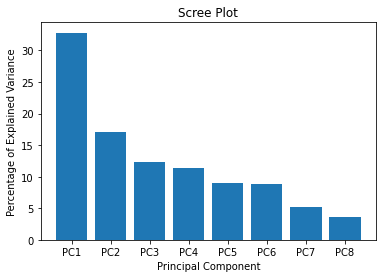


Explained Variance Ratio dos 5 primeiros PCAs: 0.8239991487617391

PCAs - Todas estações:

PCA 1:


[('PressaoAtmosferica', 0.5210477274287442),
 ('TemperaturaDoAr', 0.4905006395615627),
 ('DirecaoDoVento', 0.36173905341277246),
 ('VelocidadeDoVento', 0.35855621782168634),
 ('UmidadeRelativa', 0.33656023475977637),
 ('PontoDeOrvalho', 0.24107210752185654),
 ('RadiacaoSolar', 0.23664884061807243),
 ('Precipitacao', 0.03330852467484156)]


PCA 2:


[('RadiacaoSolar', -0.617894324849087),
 ('UmidadeRelativa', 0.5789063267663765),
 ('PontoDeOrvalho', 0.35462298061308806),
 ('VelocidadeDoVento', -0.2278913395739548),
 ('Precipitacao', 0.2184034422614706),
 ('DirecaoDoVento', -0.15775099913720292),
 ('TemperaturaDoAr', -0.13432758880456586),
 ('PressaoAtmosferica', 0.12146112416298355)]


PCA 3:


[('Precipitacao', -0.9396240014749512),
 ('PontoDeOrvalho', 0.2592513684066022),
 ('DirecaoDoVento', -0.1378263468862403),
 ('VelocidadeDoVento', -0.13496933612417097),
 ('UmidadeRelativa', 0.09805993088686203),
 ('TemperaturaDoAr', 0.047497444015071874),
 ('PressaoAtmosferica', 0.025953302230294968),
 ('RadiacaoSolar', -0.01171789706137375)]


PCA 4:


[('PontoDeOrvalho', 0.6726182266103158),
 ('RadiacaoSolar', 0.42997301880435795),
 ('DirecaoDoVento', -0.34875446853876635),
 ('VelocidadeDoVento', -0.2584612953509606),
 ('Precipitacao', 0.2572618405709306),
 ('TemperaturaDoAr', 0.2095977269125746),
 ('PressaoAtmosferica', -0.1991587275385886),
 ('UmidadeRelativa', -0.15651499390140505)]


PCA 5:


[('DirecaoDoVento', -0.7270418429569914),
 ('VelocidadeDoVento', 0.6529708506108464),
 ('UmidadeRelativa', 0.1457125204528285),
 ('TemperaturaDoAr', -0.0931449451308621),
 ('PontoDeOrvalho', -0.08637783697673833),
 ('RadiacaoSolar', 0.06388898672374234),
 ('PressaoAtmosferica', 0.059900202915409165),
 ('Precipitacao', 0.0003738548233096535)]


PCA 6:


[('VelocidadeDoVento', 0.5300750453717443),
 ('PontoDeOrvalho', 0.515416303511446),
 ('DirecaoDoVento', 0.3821705075879881),
 ('TemperaturaDoAr', -0.38180080127366994),
 ('PressaoAtmosferica', -0.2902265843650561),
 ('UmidadeRelativa', -0.2087568496007101),
 ('RadiacaoSolar', -0.17992112339473867),
 ('Precipitacao', -0.03684872391845917)]


PCA 7:


[('RadiacaoSolar', -0.5799529826364417),
 ('UmidadeRelativa', -0.5593686176545595),
 ('TemperaturaDoAr', 0.550133826653387),
 ('DirecaoDoVento', -0.14831094381073948),
 ('PressaoAtmosferica', 0.11805161090665367),
 ('VelocidadeDoVento', 0.09209530094927092),
 ('PontoDeOrvalho', 0.060608766919897014),
 ('Precipitacao', 0.0051743898044102135)]


PCA 8:


[('PressaoAtmosferica', 0.7560839906966612),
 ('TemperaturaDoAr', -0.487937441969583),
 ('UmidadeRelativa', -0.37386784905646836),
 ('PontoDeOrvalho', 0.14039839932572074),
 ('VelocidadeDoVento', -0.13657226361913588),
 ('DirecaoDoVento', -0.08362669401029313),
 ('RadiacaoSolar', 0.06626423020772984),
 ('Precipitacao', 0.026996616434063946)]

In [36]:
print(f'\n***************Todas Estações***************\n'.upper())

df_scaler = df.drop(columns=drop_columns)

std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(df_scaler)

pca = PCA()
pca_data = pca.fit_transform(x_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [f'PC{x}' for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

print(f'\nExplained Variance Ratio dos {N_explained_variance} primeiros PCAs: {sum(pca.explained_variance_ratio_[:N_explained_variance])}\n')

print(f'PCAs - Todas estações:')

for i in range(len(pca.components_)):
    features = list(zip(df_scaler, pca.components_[i]))
    features.sort(key=lambda x: abs(x[1]))
    features.reverse()

    print(f'\nPCA {i+1}:')
    display(features)

## Por estação


***************ESTAÇÃO CAMILOPOLIS***************



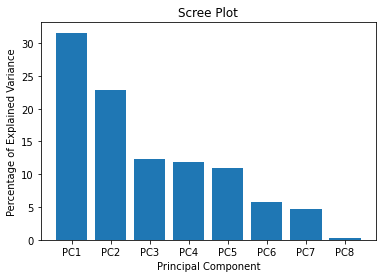


Explained Variance Ratio dos 5 primeiros PCAs: 0.8942635583756041

Feature Importante por PCA

PCA 1:


[('PressaoAtmosferica', -0.5514008801566946),
 ('PontoDeOrvalho', -0.5171439947730189),
 ('TemperaturaDoAr', -0.4567757931430878),
 ('UmidadeRelativa', -0.34985349364139995),
 ('DirecaoDoVento', -0.20320153407451233),
 ('VelocidadeDoVento', -0.20264232451805442),
 ('RadiacaoSolar', -0.10524948667214945),
 ('Precipitacao', -0.06360295776903688)]


PCA 2:


[('RadiacaoSolar', -0.6129562336041849),
 ('UmidadeRelativa', 0.5646368041081469),
 ('TemperaturaDoAr', -0.4015594392627096),
 ('DirecaoDoVento', -0.20747273019648302),
 ('VelocidadeDoVento', -0.20132117270324315),
 ('PontoDeOrvalho', 0.19879916263739084),
 ('Precipitacao', 0.1399397987451022),
 ('PressaoAtmosferica', 0.03924983031033086)]


PCA 3:


[('Precipitacao', 0.9627188385545808),
 ('DirecaoDoVento', 0.162064208717924),
 ('VelocidadeDoVento', -0.12410767832973951),
 ('PressaoAtmosferica', -0.11190986289231347),
 ('UmidadeRelativa', -0.10875106462114217),
 ('RadiacaoSolar', 0.07275345113335907),
 ('TemperaturaDoAr', 0.04256376618297949),
 ('PontoDeOrvalho', 0.007040171308461532)]


PCA 4:


[('VelocidadeDoVento', 0.7149140086685907),
 ('DirecaoDoVento', -0.6604092646992042),
 ('Precipitacao', 0.20114343367628917),
 ('RadiacaoSolar', 0.08851279306966776),
 ('TemperaturaDoAr', -0.059170518654591095),
 ('UmidadeRelativa', 0.023514084302080643),
 ('PontoDeOrvalho', -0.0186748475095913),
 ('PressaoAtmosferica', -0.007845730868191101)]


PCA 5:


[('DirecaoDoVento', 0.6503221188838605),
 ('VelocidadeDoVento', 0.5954241354783709),
 ('TemperaturaDoAr', -0.279188420818773),
 ('PontoDeOrvalho', -0.27644445355707037),
 ('RadiacaoSolar', -0.2477444076318703),
 ('UmidadeRelativa', 0.07594573823209676),
 ('PressaoAtmosferica', 0.02974153610395537),
 ('Precipitacao', 0.012406640165054415)]


PCA 6:


[('PressaoAtmosferica', -0.534111133758561),
 ('PontoDeOrvalho', 0.5050312354191773),
 ('RadiacaoSolar', -0.46622514173201707),
 ('TemperaturaDoAr', 0.3181796926164062),
 ('UmidadeRelativa', -0.3133218202776941),
 ('VelocidadeDoVento', 0.1835285648209209),
 ('DirecaoDoVento', 0.06794310539140122),
 ('Precipitacao', -0.06778632407817277)]


PCA 7:


[('RadiacaoSolar', -0.5668601155185056),
 ('PressaoAtmosferica', 0.46882032620983005),
 ('PontoDeOrvalho', -0.41738982419700876),
 ('TemperaturaDoAr', 0.37796146941060194),
 ('UmidadeRelativa', -0.32886429660760247),
 ('DirecaoDoVento', -0.16036189645064747),
 ('Precipitacao', 0.06577324203362148),
 ('VelocidadeDoVento', -0.060118139363660145)]


PCA 8:


[('UmidadeRelativa', -0.5782024406863818),
 ('TemperaturaDoAr', -0.5502305912944282),
 ('PontoDeOrvalho', 0.4323775175337163),
 ('PressaoAtmosferica', 0.4193797644563102),
 ('VelocidadeDoVento', -0.008619293960512265),
 ('Precipitacao', 0.00320057048231448),
 ('DirecaoDoVento', 0.002817164106346016),
 ('RadiacaoSolar', -0.002461136049456303)]





***************ESTAÇÃO ERASMO***************



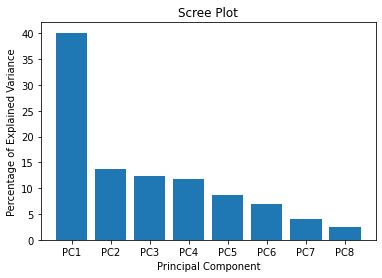


Explained Variance Ratio dos 5 primeiros PCAs: 0.8656546735524671

Feature Importante por PCA

PCA 1:


[('PressaoAtmosferica', 0.49184152114650603),
 ('TemperaturaDoAr', 0.4511077500726639),
 ('UmidadeRelativa', 0.42388699791059314),
 ('DirecaoDoVento', 0.4086197379811462),
 ('VelocidadeDoVento', 0.371478271220127),
 ('PontoDeOrvalho', 0.19538151765547102),
 ('RadiacaoSolar', 0.17074773626042633),
 ('Precipitacao', 0.05117231445933352)]


PCA 2:


[('Precipitacao', -0.5501666973594541),
 ('RadiacaoSolar', 0.4894218889813003),
 ('PontoDeOrvalho', -0.4094011479926684),
 ('UmidadeRelativa', -0.36660164765315595),
 ('VelocidadeDoVento', 0.2570495500198991),
 ('DirecaoDoVento', 0.2491218568235442),
 ('TemperaturaDoAr', -0.13855666219015572),
 ('PressaoAtmosferica', 0.09188379788038659)]


PCA 3:


[('PontoDeOrvalho', -0.6988971609892178),
 ('Precipitacao', 0.4700330444149156),
 ('RadiacaoSolar', -0.37484229083110665),
 ('VelocidadeDoVento', 0.25650629614921144),
 ('DirecaoDoVento', 0.19154280847193095),
 ('PressaoAtmosferica', 0.15882384758166837),
 ('TemperaturaDoAr', -0.14838758848975436),
 ('UmidadeRelativa', -0.019414790851178598)]


PCA 4:


[('RadiacaoSolar', 0.6862970543756844),
 ('Precipitacao', 0.6819824466974409),
 ('UmidadeRelativa', -0.21729088435540764),
 ('PressaoAtmosferica', -0.09644474327587252),
 ('PontoDeOrvalho', 0.07366714108883662),
 ('TemperaturaDoAr', -0.038130337086439516),
 ('VelocidadeDoVento', -0.02200101676310353),
 ('DirecaoDoVento', -0.0038162286604541858)]


PCA 5:


[('PontoDeOrvalho', 0.5399567460585348),
 ('VelocidadeDoVento', 0.5117335641165456),
 ('TemperaturaDoAr', -0.4372491306648807),
 ('UmidadeRelativa', -0.3872783975217029),
 ('RadiacaoSolar', -0.2517927020298518),
 ('DirecaoDoVento', 0.18026656739673805),
 ('Precipitacao', 0.07375732891846307),
 ('PressaoAtmosferica', 0.06378376441228598)]


PCA 6:


[('DirecaoDoVento', -0.7364204006961024),
 ('VelocidadeDoVento', 0.6262224462647357),
 ('UmidadeRelativa', 0.17641707569910173),
 ('RadiacaoSolar', 0.10546688409143565),
 ('PontoDeOrvalho', -0.09134649030184185),
 ('PressaoAtmosferica', -0.0852412958463289),
 ('TemperaturaDoAr', 0.08175704776694305),
 ('Precipitacao', -0.03145978904937639)]


PCA 7:


[('TemperaturaDoAr', 0.676752616896212),
 ('PressaoAtmosferica', -0.5292005559667579),
 ('UmidadeRelativa', -0.3902522735567932),
 ('VelocidadeDoVento', 0.201527865053356),
 ('DirecaoDoVento', 0.18862583512819095),
 ('RadiacaoSolar', -0.18028017276052666),
 ('Precipitacao', 0.028861597109064805),
 ('PontoDeOrvalho', -0.011345110106739671)]


PCA 8:


[('PressaoAtmosferica', -0.6509493122674644),
 ('UmidadeRelativa', 0.5522014157996513),
 ('DirecaoDoVento', 0.35195774113703965),
 ('TemperaturaDoAr', -0.3129950935084137),
 ('VelocidadeDoVento', 0.18711126342606904),
 ('RadiacaoSolar', 0.11303657010741144),
 ('Precipitacao', -0.03747032452729879),
 ('PontoDeOrvalho', -0.017506936854294886)]





***************ESTAÇÃO PARAISO***************



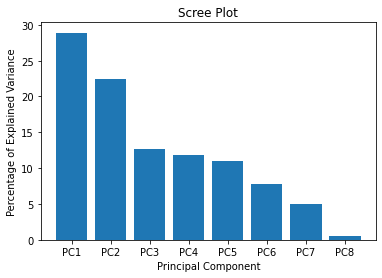


Explained Variance Ratio dos 5 primeiros PCAs: 0.8678630202520188

Feature Importante por PCA

PCA 1:


[('PontoDeOrvalho', 0.5218697767719729),
 ('PressaoAtmosferica', 0.5087551364380567),
 ('TemperaturaDoAr', 0.46870770293561254),
 ('UmidadeRelativa', 0.3786400501882213),
 ('VelocidadeDoVento', 0.217870385754907),
 ('DirecaoDoVento', 0.1739600277042208),
 ('RadiacaoSolar', 0.16461016461103273),
 ('Precipitacao', 0.03064059922767362)]


PCA 2:


[('UmidadeRelativa', -0.5611412737975265),
 ('RadiacaoSolar', 0.5605607937840293),
 ('TemperaturaDoAr', 0.38099188952197266),
 ('PontoDeOrvalho', -0.32369753682473945),
 ('VelocidadeDoVento', 0.2673941105438894),
 ('DirecaoDoVento', 0.20529437779981002),
 ('Precipitacao', -0.07698021955321713),
 ('PressaoAtmosferica', 0.037226414989228296)]


PCA 3:


[('Precipitacao', 0.8662963732039805),
 ('DirecaoDoVento', 0.4602326691143073),
 ('RadiacaoSolar', -0.13901174788372322),
 ('PontoDeOrvalho', -0.09837743780718593),
 ('UmidadeRelativa', -0.07051483209043388),
 ('TemperaturaDoAr', -0.03779567039881684),
 ('PressaoAtmosferica', 0.036873755494834015),
 ('VelocidadeDoVento', -0.030879922999036243)]


PCA 4:


[('DirecaoDoVento', 0.72312969110346),
 ('VelocidadeDoVento', -0.5179314067006991),
 ('Precipitacao', -0.4294358386297799),
 ('RadiacaoSolar', -0.14105662803768101),
 ('PressaoAtmosferica', 0.04582598350832159),
 ('TemperaturaDoAr', 0.03879627118729787),
 ('UmidadeRelativa', -0.02559761566713348),
 ('PontoDeOrvalho', -0.016061962340913245)]


PCA 5:


[('VelocidadeDoVento', 0.7242283955995541),
 ('RadiacaoSolar', -0.34641451262227174),
 ('TemperaturaDoAr', -0.31904342961122856),
 ('DirecaoDoVento', 0.3122650825282056),
 ('PontoDeOrvalho', -0.23914133635467738),
 ('Precipitacao', -0.2383001781665002),
 ('PressaoAtmosferica', 0.18930433087610868),
 ('UmidadeRelativa', 0.07987703894980834)]


PCA 6:


[('PressaoAtmosferica', -0.6952953202659061),
 ('RadiacaoSolar', 0.3860894977653382),
 ('PontoDeOrvalho', 0.35404716234217953),
 ('DirecaoDoVento', 0.3081513749787622),
 ('VelocidadeDoVento', 0.23731152748459358),
 ('UmidadeRelativa', 0.2348050072324256),
 ('TemperaturaDoAr', -0.18863569784413137),
 ('Precipitacao', -0.012612504436278291)]


PCA 7:


[('RadiacaoSolar', -0.5905892132488764),
 ('TemperaturaDoAr', 0.5240212781102467),
 ('PressaoAtmosferica', -0.39095885917800244),
 ('UmidadeRelativa', -0.33823867014889514),
 ('PontoDeOrvalho', 0.27708428849077765),
 ('VelocidadeDoVento', 0.17604751082102463),
 ('Precipitacao', -0.03495036901987793),
 ('DirecaoDoVento', -0.019023575861884107)]


PCA 8:


[('UmidadeRelativa', -0.6001712030786418),
 ('PontoDeOrvalho', 0.5946612977126802),
 ('TemperaturaDoAr', -0.4693124434498077),
 ('PressaoAtmosferica', 0.2533814691808781),
 ('RadiacaoSolar', 0.03987628580941882),
 ('Precipitacao', -0.009114563813453751),
 ('DirecaoDoVento', 0.005728806441948196),
 ('VelocidadeDoVento', 0.0031806964653038924)]





***************ESTAÇÃO RM***************



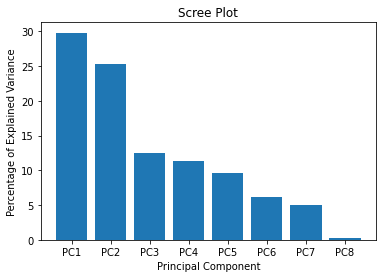


Explained Variance Ratio dos 5 primeiros PCAs: 0.8855600178756581

Feature Importante por PCA

PCA 1:


[('PressaoAtmosferica', -0.5440585125297539),
 ('PontoDeOrvalho', -0.5039318436738832),
 ('TemperaturaDoAr', -0.4697017221562474),
 ('UmidadeRelativa', -0.29860975508131404),
 ('DirecaoDoVento', -0.2529346184729888),
 ('VelocidadeDoVento', -0.23258056566736995),
 ('RadiacaoSolar', -0.12181322346785839),
 ('Precipitacao', -0.08577549818698357)]


PCA 2:


[('UmidadeRelativa', -0.5699486311399613),
 ('RadiacaoSolar', 0.5569865991428815),
 ('TemperaturaDoAr', 0.3371245211299249),
 ('VelocidadeDoVento', 0.3259177350223225),
 ('PontoDeOrvalho', -0.2709350662394044),
 ('DirecaoDoVento', 0.22467314882930928),
 ('Precipitacao', -0.12391410738480313),
 ('PressaoAtmosferica', -0.07622751180361143)]


PCA 3:


[('Precipitacao', 0.9124415616762832),
 ('VelocidadeDoVento', 0.2603809919280603),
 ('DirecaoDoVento', 0.22309803392159064),
 ('PressaoAtmosferica', -0.16207156008965362),
 ('TemperaturaDoAr', -0.12965800939490324),
 ('PontoDeOrvalho', -0.06575492850565241),
 ('RadiacaoSolar', -0.04214387443568928),
 ('UmidadeRelativa', -0.026480106934234596)]


PCA 4:


[('DirecaoDoVento', -0.7048268949720244),
 ('VelocidadeDoVento', -0.34673006436579445),
 ('Precipitacao', 0.3354352341444667),
 ('TemperaturaDoAr', 0.3192916929683775),
 ('RadiacaoSolar', 0.30922831643468185),
 ('PontoDeOrvalho', 0.2170860511009681),
 ('UmidadeRelativa', -0.15620481540945527),
 ('PressaoAtmosferica', -0.03721396861501042)]


PCA 5:


[('VelocidadeDoVento', -0.756454161980619),
 ('DirecaoDoVento', 0.5497266644697623),
 ('TemperaturaDoAr', 0.24165526571361515),
 ('UmidadeRelativa', -0.20261310830482682),
 ('Precipitacao', 0.09662565067732813),
 ('RadiacaoSolar', -0.09609342894194796),
 ('PressaoAtmosferica', -0.07047826017196515),
 ('PontoDeOrvalho', 0.05089899289359141)]


PCA 6:


[('PressaoAtmosferica', 0.625535725759025),
 ('PontoDeOrvalho', -0.5453798678207681),
 ('RadiacaoSolar', 0.3551890572920783),
 ('VelocidadeDoVento', -0.2600623375281612),
 ('TemperaturaDoAr', -0.24712341592711737),
 ('UmidadeRelativa', 0.19523311123791381),
 ('Precipitacao', 0.13498425967867034),
 ('DirecaoDoVento', -0.008213949729827946)]


PCA 7:


[('RadiacaoSolar', -0.6648385982699613),
 ('TemperaturaDoAr', 0.36738740322804264),
 ('PressaoAtmosferica', 0.3668638958476324),
 ('UmidadeRelativa', -0.35006111566799414),
 ('PontoDeOrvalho', -0.33593288827534273),
 ('DirecaoDoVento', -0.191404146807524),
 ('VelocidadeDoVento', 0.10840828760991647),
 ('Precipitacao', 0.06815733091840062)]


PCA 8:


[('UmidadeRelativa', -0.5993152822415861),
 ('TemperaturaDoAr', -0.5408587714554175),
 ('PontoDeOrvalho', 0.4564164868638086),
 ('PressaoAtmosferica', 0.3737464165767074),
 ('RadiacaoSolar', -0.011208651601068598),
 ('DirecaoDoVento', 0.009484110033690641),
 ('VelocidadeDoVento', -0.007499105166011745),
 ('Precipitacao', 0.004332393594643075)]





***************ESTAÇÃO VITORIA***************



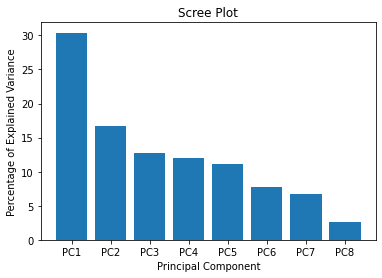


Explained Variance Ratio dos 5 primeiros PCAs: 0.8308179704824716

Feature Importante por PCA

PCA 1:


[('TemperaturaDoAr', 0.5175422508255376),
 ('PressaoAtmosferica', 0.5087573735468236),
 ('DirecaoDoVento', 0.3722286363317551),
 ('VelocidadeDoVento', 0.36494975480935343),
 ('UmidadeRelativa', 0.30308648530919435),
 ('RadiacaoSolar', 0.2811076866031521),
 ('PontoDeOrvalho', 0.17433866325340308),
 ('Precipitacao', 0.0172207340705527)]


PCA 2:


[('UmidadeRelativa', 0.5650219273608112),
 ('RadiacaoSolar', -0.5171943078208883),
 ('VelocidadeDoVento', -0.347843306332886),
 ('PontoDeOrvalho', 0.343993197370572),
 ('PressaoAtmosferica', 0.29097533723307045),
 ('DirecaoDoVento', -0.27918280873040063),
 ('Precipitacao', 0.10600553797496935),
 ('TemperaturaDoAr', -0.009333933333045538)]


PCA 3:


[('Precipitacao', 0.8736605735653118),
 ('DirecaoDoVento', 0.27592421183966687),
 ('VelocidadeDoVento', 0.25270092902247426),
 ('RadiacaoSolar', -0.21090448144824087),
 ('TemperaturaDoAr', -0.19088166633596798),
 ('PressaoAtmosferica', -0.09090892548871551),
 ('PontoDeOrvalho', -0.08203197570242518),
 ('UmidadeRelativa', 0.028549665148000395)]


PCA 4:


[('PontoDeOrvalho', 0.5480178397753375),
 ('TemperaturaDoAr', -0.3931028293633083),
 ('VelocidadeDoVento', 0.38157115842176315),
 ('DirecaoDoVento', 0.36593390221255184),
 ('Precipitacao', -0.3380824981216774),
 ('PressaoAtmosferica', -0.3180105321528681),
 ('RadiacaoSolar', -0.16420566811733497),
 ('UmidadeRelativa', 0.15247448169611202)]


PCA 5:


[('PontoDeOrvalho', 0.7067090610629579),
 ('RadiacaoSolar', 0.4337640403409458),
 ('Precipitacao', 0.32661556024693866),
 ('DirecaoDoVento', -0.25942790404425653),
 ('UmidadeRelativa', -0.25355813812956185),
 ('VelocidadeDoVento', -0.18254586944870885),
 ('PressaoAtmosferica', -0.15405133546413433),
 ('TemperaturaDoAr', 0.13070562690104703)]


PCA 6:


[('DirecaoDoVento', 0.551726895225577),
 ('UmidadeRelativa', -0.4878225087528471),
 ('VelocidadeDoVento', -0.42564896783372763),
 ('RadiacaoSolar', -0.40726498506917225),
 ('TemperaturaDoAr', 0.2758866698886872),
 ('PontoDeOrvalho', 0.15782043648594324),
 ('PressaoAtmosferica', 0.08425893580900862),
 ('Precipitacao', -0.04964381229280089)]


PCA 7:


[('VelocidadeDoVento', 0.5592337952369278),
 ('UmidadeRelativa', -0.45694224205377976),
 ('DirecaoDoVento', -0.44267076383405113),
 ('RadiacaoSolar', -0.43113282291064675),
 ('PressaoAtmosferica', 0.23673278442708973),
 ('TemperaturaDoAr', 0.15228644164338037),
 ('PontoDeOrvalho', 0.12521327727534032),
 ('Precipitacao', -0.04143063130589637)]


PCA 8:


[('PressaoAtmosferica', 0.6784028030938722),
 ('TemperaturaDoAr', -0.651696766501161),
 ('UmidadeRelativa', -0.23187606828874208),
 ('RadiacaoSolar', 0.20531145366561251),
 ('VelocidadeDoVento', -0.0954983048543304),
 ('DirecaoDoVento', 0.07614591696661599),
 ('PontoDeOrvalho', 0.06479630345154339),
 ('Precipitacao', -0.004996938388097508)]

In [37]:
for estacao in estacoes:
    print(f'\n***************Estação {estacao}***************\n'.upper())

    df_scaler = df[df['Local'] == estacoes[estacao]]
    df_scaler = df_scaler.drop(columns=drop_columns)

    std_scaler = StandardScaler()
    x_scaled = std_scaler.fit_transform(df_scaler)

    pca = PCA()
    pca_data = pca.fit_transform(x_scaled)

    per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
    labels = [f'PC{x}' for x in range(1, len(per_var)+1)]

    plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Component')
    plt.title('Scree Plot')
    plt.show()

    print(f'\nExplained Variance Ratio dos {N_explained_variance} primeiros PCAs: {sum(pca.explained_variance_ratio_[:N_explained_variance])}\n')

    print(f'Feature Importante por PCA')

    for i in range(len(pca.components_)):
        features = list(zip(df_scaler, pca.components_[i]))
        features.sort(key=lambda x: abs(x[1]))
        features.reverse()

        print(f'\nPCA {i+1}:')
        display(features)

    print('\n\n')

## Todas estações - Sem Outliers


***************TODAS ESTAÇÕES***************



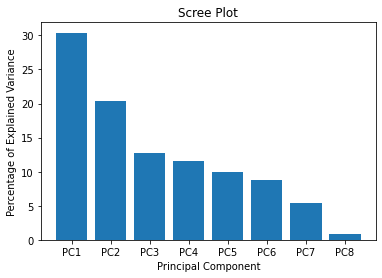


Explained Variance Ratio dos 5 primeiros PCAs: 0.8486729912783052

PCAs - Todas estações:

PCA 1:


[('PontoDeOrvalho', 0.5125199490392086),
 ('TemperaturaDoAr', 0.5053590219782511),
 ('DirecaoDoVento', 0.35558921059231463),
 ('VelocidadeDoVento', 0.35512672642222953),
 ('UmidadeRelativa', 0.29237212103129717),
 ('PressaoAtmosferica', 0.28243809734735037),
 ('RadiacaoSolar', 0.2487161498435645),
 ('Precipitacao', 0.047585954340126024)]


PCA 2:


[('UmidadeRelativa', 0.6378995436703017),
 ('RadiacaoSolar', -0.5592176781129655),
 ('PontoDeOrvalho', 0.3394943107342517),
 ('VelocidadeDoVento', -0.24745827560785166),
 ('DirecaoDoVento', -0.19414592924204166),
 ('TemperaturaDoAr', -0.18423080707587516),
 ('Precipitacao', 0.16372047527382066),
 ('PressaoAtmosferica', 0.0736868328974617)]


PCA 3:


[('Precipitacao', 0.8298460759886938),
 ('PressaoAtmosferica', -0.5136833487268747),
 ('TemperaturaDoAr', 0.14407868578510322),
 ('UmidadeRelativa', -0.12073515763528551),
 ('PontoDeOrvalho', 0.0956519768996667),
 ('RadiacaoSolar', 0.04030634626600328),
 ('DirecaoDoVento', 0.035641781289091325),
 ('VelocidadeDoVento', -0.010248054085671272)]


PCA 4:


[('PressaoAtmosferica', 0.5998275776551785),
 ('Precipitacao', 0.47701793971552364),
 ('PontoDeOrvalho', -0.3673053116994217),
 ('TemperaturaDoAr', -0.35849300411545604),
 ('VelocidadeDoVento', 0.30561831905416526),
 ('DirecaoDoVento', 0.22383860225110488),
 ('RadiacaoSolar', -0.07174456003412465),
 ('UmidadeRelativa', 0.024016194074660817)]


PCA 5:


[('DirecaoDoVento', -0.6935615587794647),
 ('RadiacaoSolar', 0.42793891604356415),
 ('PressaoAtmosferica', 0.41877656092397164),
 ('VelocidadeDoVento', -0.27684172865348866),
 ('Precipitacao', 0.2222238530332638),
 ('TemperaturaDoAr', 0.16804179321805068),
 ('PontoDeOrvalho', 0.06944658552599614),
 ('UmidadeRelativa', -0.03716428728752849)]


PCA 6:


[('VelocidadeDoVento', -0.7875232199881358),
 ('DirecaoDoVento', 0.5175263608534804),
 ('PressaoAtmosferica', 0.23928341704321868),
 ('TemperaturaDoAr', 0.16806280750391875),
 ('UmidadeRelativa', -0.1432197068332234),
 ('Precipitacao', 0.0701618809168646),
 ('PontoDeOrvalho', -0.02843983701669789),
 ('RadiacaoSolar', -0.015119013677166102)]


PCA 7:


[('RadiacaoSolar', -0.6574457330861424),
 ('TemperaturaDoAr', 0.5401317264993118),
 ('UmidadeRelativa', -0.41717199170051017),
 ('PressaoAtmosferica', 0.2032985919028814),
 ('DirecaoDoVento', -0.18764558510470203),
 ('VelocidadeDoVento', 0.14619787710441562),
 ('PontoDeOrvalho', -0.06057479567027885),
 ('Precipitacao', 0.02015061281977478)]


PCA 8:


[('PontoDeOrvalho', 0.6846192107202709),
 ('UmidadeRelativa', -0.5445396402719247),
 ('TemperaturaDoAr', -0.4617032958804882),
 ('PressaoAtmosferica', 0.1310518486269182),
 ('RadiacaoSolar', -0.055215844255483704),
 ('VelocidadeDoVento', 0.030558901250074454),
 ('DirecaoDoVento', 0.020434760428170627),
 ('Precipitacao', 0.00532735334134813)]

In [38]:
print(f'\n***************Todas Estações***************\n'.upper())

df_scaler = df.drop(columns=drop_columns)

remove_outliers(df_scaler)

std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(df_scaler)

pca = PCA()
pca_data = pca.fit_transform(x_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [f'PC{x}' for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

print(f'\nExplained Variance Ratio dos {N_explained_variance} primeiros PCAs: {sum(pca.explained_variance_ratio_[:N_explained_variance])}\n')

print(f'PCAs - Todas estações:')

for i in range(len(pca.components_)):
    features = list(zip(df_scaler, pca.components_[i]))
    features.sort(key=lambda x: abs(x[1]))
    features.reverse()

    print(f'\nPCA {i+1}:')
    display(features)

## Por Estação - Sem Outliers


***************ESTAÇÃO CAMILOPOLIS***************



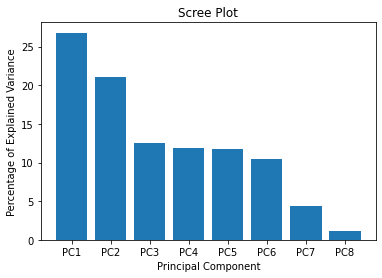


Explained Variance Ratio dos 5 primeiros PCAs: 0.8400406498173718

Feature Importante por PCA

PCA 1:


[('TemperaturaDoAr', 0.572887326584538),
 ('RadiacaoSolar', 0.5220037751453632),
 ('UmidadeRelativa', -0.44835803729059864),
 ('DirecaoDoVento', 0.2610619357376093),
 ('VelocidadeDoVento', 0.2547772151584601),
 ('PressaoAtmosferica', -0.20625601035889018),
 ('PontoDeOrvalho', 0.1412024811279668),
 ('Precipitacao', -0.0523716911022056)]


PCA 2:


[('PontoDeOrvalho', 0.6966054457738028),
 ('UmidadeRelativa', 0.48084532571434774),
 ('TemperaturaDoAr', 0.27044450612664295),
 ('PressaoAtmosferica', -0.269367949164407),
 ('Precipitacao', 0.24625673101476497),
 ('RadiacaoSolar', -0.24473291900955868),
 ('DirecaoDoVento', 0.1072686795237798),
 ('VelocidadeDoVento', 0.07606677265423067)]


PCA 3:


[('PressaoAtmosferica', -0.71418972742857),
 ('VelocidadeDoVento', -0.49523477026332313),
 ('Precipitacao', 0.3245617604181723),
 ('UmidadeRelativa', -0.2975536641945959),
 ('PontoDeOrvalho', -0.14354662102583082),
 ('RadiacaoSolar', -0.12621863841955988),
 ('DirecaoDoVento', -0.11316446724683014),
 ('TemperaturaDoAr', -0.038132170364218176)]


PCA 4:


[('Precipitacao', 0.8820047629288698),
 ('VelocidadeDoVento', 0.35588235110910305),
 ('PressaoAtmosferica', 0.18742831143620664),
 ('PontoDeOrvalho', -0.1632962010347061),
 ('RadiacaoSolar', 0.1429285802283728),
 ('TemperaturaDoAr', -0.09450614629317311),
 ('DirecaoDoVento', -0.05928205101879232),
 ('UmidadeRelativa', -0.027312576468925414)]


PCA 5:


[('DirecaoDoVento', 0.8232556991862366),
 ('VelocidadeDoVento', -0.460816417300246),
 ('PressaoAtmosferica', 0.2713168354496229),
 ('Precipitacao', 0.1759965749636282),
 ('PontoDeOrvalho', -0.06273999117543125),
 ('UmidadeRelativa', 0.03241386801452778),
 ('RadiacaoSolar', -0.017975365184356717),
 ('TemperaturaDoAr', 0.0007646049650419096)]


PCA 6:


[('VelocidadeDoVento', -0.5843168866906799),
 ('DirecaoDoVento', -0.46608053639441427),
 ('PressaoAtmosferica', 0.41180025269914344),
 ('RadiacaoSolar', 0.3405399783242457),
 ('TemperaturaDoAr', 0.26802740705383143),
 ('PontoDeOrvalho', 0.2546194376023726),
 ('Precipitacao', 0.13792251149932924),
 ('UmidadeRelativa', 0.010169387740640919)]


PCA 7:


[('RadiacaoSolar', 0.7168944311748155),
 ('TemperaturaDoAr', -0.4645380680071381),
 ('UmidadeRelativa', 0.41493088365173103),
 ('PressaoAtmosferica', -0.2885393036130342),
 ('DirecaoDoVento', 0.08257289119512967),
 ('Precipitacao', -0.0572338226577991),
 ('VelocidadeDoVento', -0.050203639192022226),
 ('PontoDeOrvalho', 0.04722067111723266)]


PCA 8:


[('PontoDeOrvalho', -0.6136238866625745),
 ('UmidadeRelativa', 0.5524101462970205),
 ('TemperaturaDoAr', 0.5483060403281248),
 ('PressaoAtmosferica', -0.11513394117505993),
 ('DirecaoDoVento', -0.04711945323596202),
 ('VelocidadeDoVento', -0.03308007424287987),
 ('RadiacaoSolar', 0.03209232488327196),
 ('Precipitacao', -0.008304589865078899)]





***************ESTAÇÃO ERASMO***************



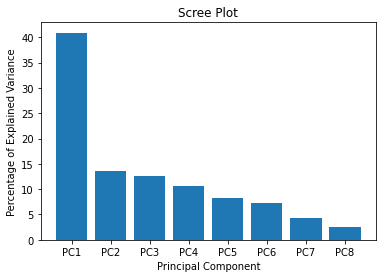


Explained Variance Ratio dos 5 primeiros PCAs: 0.8592132567999893

Feature Importante por PCA

PCA 1:


[('PressaoAtmosferica', 0.4832620744772973),
 ('TemperaturaDoAr', 0.44639580141641044),
 ('UmidadeRelativa', 0.4256078634101514),
 ('DirecaoDoVento', 0.39817439762052637),
 ('VelocidadeDoVento', 0.34270066165768365),
 ('PontoDeOrvalho', 0.23911571468037363),
 ('RadiacaoSolar', 0.2221675879916328),
 ('Precipitacao', 0.05937293887738143)]


PCA 2:


[('PontoDeOrvalho', -0.5920627523886861),
 ('Precipitacao', -0.39668358212086796),
 ('VelocidadeDoVento', 0.3753062391446102),
 ('UmidadeRelativa', -0.33291360780202545),
 ('DirecaoDoVento', 0.3217554711483788),
 ('RadiacaoSolar', 0.25375736275989574),
 ('TemperaturaDoAr', -0.20415402153899323),
 ('PressaoAtmosferica', 0.17555438652948233)]


PCA 3:


[('Precipitacao', 0.8461265865912008),
 ('RadiacaoSolar', 0.4452206495239993),
 ('PontoDeOrvalho', -0.22304210917033887),
 ('TemperaturaDoAr', -0.12770802600217687),
 ('UmidadeRelativa', -0.12617656919422549),
 ('VelocidadeDoVento', 0.05248413133251963),
 ('PressaoAtmosferica', -0.024824179437807996),
 ('DirecaoDoVento', 0.022358438950667345)]


PCA 4:


[('RadiacaoSolar', -0.7900103752646893),
 ('PontoDeOrvalho', -0.41348085212557606),
 ('Precipitacao', 0.32020298112972057),
 ('VelocidadeDoVento', 0.20063261426869364),
 ('UmidadeRelativa', 0.16378793958563853),
 ('PressaoAtmosferica', 0.15380861682521038),
 ('DirecaoDoVento', 0.10793246851902849),
 ('TemperaturaDoAr', -0.0008940598392914653)]


PCA 5:


[('VelocidadeDoVento', 0.6855670811983191),
 ('PontoDeOrvalho', 0.5330602252742717),
 ('TemperaturaDoAr', -0.31931177618732626),
 ('UmidadeRelativa', -0.31698518896175676),
 ('RadiacaoSolar', -0.15521526586128068),
 ('DirecaoDoVento', -0.10532159431008592),
 ('Precipitacao', 0.08615415016883915),
 ('PressaoAtmosferica', -0.028248865446464655)]


PCA 6:


[('DirecaoDoVento', -0.7329510084745189),
 ('VelocidadeDoVento', 0.4142070413326902),
 ('UmidadeRelativa', 0.3374763331189294),
 ('PontoDeOrvalho', -0.2923105464037265),
 ('TemperaturaDoAr', 0.2092301976703672),
 ('RadiacaoSolar', 0.16983913988836752),
 ('PressaoAtmosferica', -0.10223001047235972),
 ('Precipitacao', -0.09384045522044827)]


PCA 7:


[('TemperaturaDoAr', 0.7240297846849366),
 ('PressaoAtmosferica', -0.488646576282332),
 ('UmidadeRelativa', -0.42060245935598445),
 ('DirecaoDoVento', 0.15989760859333965),
 ('VelocidadeDoVento', 0.15460687840924278),
 ('RadiacaoSolar', -0.0803635096930249),
 ('Precipitacao', 0.04988249305528428),
 ('PontoDeOrvalho', -0.04101068972142086)]


PCA 8:


[('PressaoAtmosferica', -0.6792206153342782),
 ('UmidadeRelativa', 0.5234530984945358),
 ('DirecaoDoVento', 0.38974887302850897),
 ('TemperaturaDoAr', -0.2697876379282171),
 ('VelocidadeDoVento', 0.18226483655571374),
 ('RadiacaoSolar', 0.06719775307334057),
 ('Precipitacao', -0.044045526484267634),
 ('PontoDeOrvalho', -0.017048129206824914)]





***************ESTAÇÃO PARAISO***************



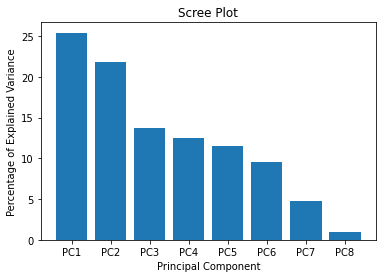


Explained Variance Ratio dos 5 primeiros PCAs: 0.8480620481983958

Feature Importante por PCA

PCA 1:


[('RadiacaoSolar', 0.5518042406315413),
 ('TemperaturaDoAr', 0.5501095723901166),
 ('UmidadeRelativa', -0.46253914518535183),
 ('VelocidadeDoVento', 0.27862371688869975),
 ('DirecaoDoVento', 0.2488982189846104),
 ('PressaoAtmosferica', -0.19340611754446857),
 ('Precipitacao', -0.04254755833057843),
 ('PontoDeOrvalho', -0.012302743877298739)]


PCA 2:


[('PontoDeOrvalho', 0.7208121592285994),
 ('UmidadeRelativa', 0.4906794269053886),
 ('TemperaturaDoAr', 0.33512996237818615),
 ('PressaoAtmosferica', -0.29915503825850087),
 ('Precipitacao', 0.12029974525277501),
 ('DirecaoDoVento', 0.11907053157248547),
 ('RadiacaoSolar', -0.08154898098403679),
 ('VelocidadeDoVento', 0.050573174950575187)]


PCA 3:


[('PressaoAtmosferica', -0.6378841856815715),
 ('VelocidadeDoVento', -0.5714995963725367),
 ('Precipitacao', 0.31418325347753495),
 ('UmidadeRelativa', -0.26219403159873145),
 ('RadiacaoSolar', -0.22268341270195818),
 ('PontoDeOrvalho', -0.1580907165704472),
 ('DirecaoDoVento', 0.1552672437922935),
 ('TemperaturaDoAr', 0.01861870238381)]


PCA 4:


[('Precipitacao', 0.8567040228835555),
 ('VelocidadeDoVento', 0.33772028365634443),
 ('DirecaoDoVento', 0.2892333447875119),
 ('PressaoAtmosferica', 0.20550101861696093),
 ('PontoDeOrvalho', -0.11234317030712629),
 ('TemperaturaDoAr', -0.10508476024085484),
 ('UmidadeRelativa', 0.04296807676616276),
 ('RadiacaoSolar', -0.024628853447003177)]


PCA 5:


[('DirecaoDoVento', -0.8941309848639141),
 ('Precipitacao', 0.3202616462653632),
 ('PressaoAtmosferica', -0.2061907602417793),
 ('RadiacaoSolar', 0.14598571611840294),
 ('VelocidadeDoVento', 0.13757532102247952),
 ('UmidadeRelativa', -0.09345179937928472),
 ('TemperaturaDoAr', 0.063251119803071),
 ('PontoDeOrvalho', 0.049748256250793904)]


PCA 6:


[('VelocidadeDoVento', -0.6772986493716547),
 ('PressaoAtmosferica', 0.5110008549257709),
 ('RadiacaoSolar', 0.4035506096734157),
 ('Precipitacao', 0.21949195062149338),
 ('TemperaturaDoAr', 0.1912587561338778),
 ('PontoDeOrvalho', 0.16789966547626634),
 ('DirecaoDoVento', -0.057955554171552064),
 ('UmidadeRelativa', 0.03139743850696061)]


PCA 7:


[('RadiacaoSolar', -0.6696414020186081),
 ('TemperaturaDoAr', 0.5894060895095597),
 ('PressaoAtmosferica', 0.33350208916683133),
 ('UmidadeRelativa', -0.28456934874560325),
 ('DirecaoDoVento', -0.10661613235455711),
 ('VelocidadeDoVento', 0.01898457083719257),
 ('Precipitacao', 0.015314387682849998),
 ('PontoDeOrvalho', -0.003943672051077762)]


PCA 8:


[('PontoDeOrvalho', -0.6418598537099796),
 ('UmidadeRelativa', 0.6196777559010022),
 ('TemperaturaDoAr', 0.4309266172594254),
 ('PressaoAtmosferica', -0.09546353734849777),
 ('RadiacaoSolar', 0.07799249855577778),
 ('DirecaoDoVento', -0.04372615160540799),
 ('VelocidadeDoVento', -0.03351949269711233),
 ('Precipitacao', -0.009274052797884173)]





***************ESTAÇÃO RM***************



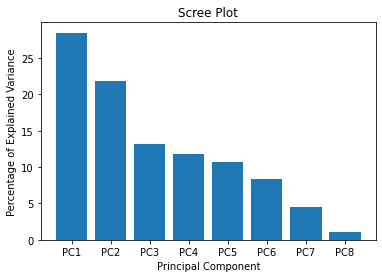


Explained Variance Ratio dos 5 primeiros PCAs: 0.859854266851024

Feature Importante por PCA

PCA 1:


[('TemperaturaDoAr', 0.519766014782705),
 ('RadiacaoSolar', 0.5064111385611854),
 ('UmidadeRelativa', -0.4682924863456337),
 ('VelocidadeDoVento', 0.35226448294105994),
 ('DirecaoDoVento', 0.28877854542430936),
 ('PressaoAtmosferica', -0.20737167477053686),
 ('Precipitacao', -0.04742474033848117),
 ('PontoDeOrvalho', 0.03684785092609011)]


PCA 2:


[('PontoDeOrvalho', 0.689564158364616),
 ('UmidadeRelativa', 0.40159634856098125),
 ('PressaoAtmosferica', -0.3524076653719216),
 ('TemperaturaDoAr', 0.3116546800712769),
 ('Precipitacao', 0.265084972455168),
 ('RadiacaoSolar', -0.21747867173454832),
 ('DirecaoDoVento', 0.15522168847313175),
 ('VelocidadeDoVento', 0.015525921703279363)]


PCA 3:


[('VelocidadeDoVento', 0.5814701029126272),
 ('PressaoAtmosferica', 0.5779420494404043),
 ('DirecaoDoVento', 0.3792540073473019),
 ('UmidadeRelativa', 0.29430990661447587),
 ('Precipitacao', 0.26794730985207266),
 ('TemperaturaDoAr', -0.14681442785253634),
 ('RadiacaoSolar', 0.06321568170335878),
 ('PontoDeOrvalho', 0.008782037983600832)]


PCA 4:


[('Precipitacao', 0.9011009423593609),
 ('PontoDeOrvalho', -0.2530693123689449),
 ('PressaoAtmosferica', -0.2290911133263037),
 ('UmidadeRelativa', -0.20168857335904103),
 ('TemperaturaDoAr', -0.11856993175565755),
 ('DirecaoDoVento', -0.11721541107691624),
 ('VelocidadeDoVento', -0.03928367556488876),
 ('RadiacaoSolar', 0.038347196913608744)]


PCA 5:


[('DirecaoDoVento', -0.7890065751531252),
 ('RadiacaoSolar', 0.3562398327977661),
 ('PressaoAtmosferica', 0.321577412035659),
 ('PontoDeOrvalho', 0.2819703254029766),
 ('TemperaturaDoAr', 0.19686518479710932),
 ('VelocidadeDoVento', 0.11998639631844008),
 ('Precipitacao', 0.09173222529838213),
 ('UmidadeRelativa', 0.0779427489190848)]


PCA 6:


[('VelocidadeDoVento', -0.7105962921583865),
 ('PressaoAtmosferica', 0.48673976230053073),
 ('DirecaoDoVento', 0.3105043136616964),
 ('TemperaturaDoAr', 0.259431284259648),
 ('RadiacaoSolar', 0.22599956933793136),
 ('Precipitacao', 0.1780767814015525),
 ('PontoDeOrvalho', 0.10156376526750249),
 ('UmidadeRelativa', -0.03629668691031514)]


PCA 7:


[('RadiacaoSolar', -0.715361957023888),
 ('TemperaturaDoAr', 0.45799005940813603),
 ('UmidadeRelativa', -0.3846595726897291),
 ('PressaoAtmosferica', 0.30828345711770205),
 ('VelocidadeDoVento', 0.1287195614879011),
 ('DirecaoDoVento', -0.11293711891077463),
 ('Precipitacao', 0.05947904653595666),
 ('PontoDeOrvalho', -0.051375323041986)]


PCA 8:


[('PontoDeOrvalho', -0.6054423339065),
 ('UmidadeRelativa', 0.5803192309824919),
 ('TemperaturaDoAr', 0.5303639868711749),
 ('PressaoAtmosferica', -0.10459329378666449),
 ('DirecaoDoVento', -0.056930020042154986),
 ('RadiacaoSolar', 0.0325377133128823),
 ('VelocidadeDoVento', -0.01026843834536266),
 ('Precipitacao', -0.006187406162816558)]





***************ESTAÇÃO VITORIA***************



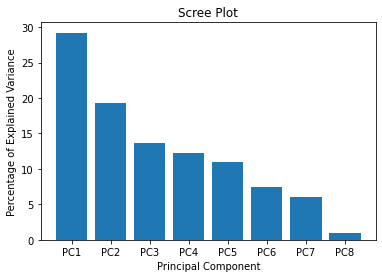


Explained Variance Ratio dos 5 primeiros PCAs: 0.8542220856697724

Feature Importante por PCA

PCA 1:


[('PontoDeOrvalho', 0.5317970764488164),
 ('TemperaturaDoAr', 0.4608281127559318),
 ('UmidadeRelativa', 0.3839582169606783),
 ('DirecaoDoVento', 0.3776584302325045),
 ('VelocidadeDoVento', 0.36489075491388945),
 ('RadiacaoSolar', 0.2849667679907475),
 ('Precipitacao', 0.018883564492088663),
 ('PressaoAtmosferica', -0.008462079434017222)]


PCA 2:


[('UmidadeRelativa', -0.5988238616870777),
 ('RadiacaoSolar', 0.4752618132608365),
 ('PontoDeOrvalho', -0.4075637058380136),
 ('VelocidadeDoVento', 0.33846239477355766),
 ('DirecaoDoVento', 0.30041024293653723),
 ('TemperaturaDoAr', 0.1612303660094862),
 ('PressaoAtmosferica', -0.12409680459368921),
 ('Precipitacao', -0.05683012091157551)]


PCA 3:


[('PressaoAtmosferica', -0.7768341865145412),
 ('Precipitacao', 0.5641717645534973),
 ('RadiacaoSolar', -0.16697713823825092),
 ('VelocidadeDoVento', -0.13771625719227565),
 ('UmidadeRelativa', -0.0956044684147693),
 ('DirecaoDoVento', 0.09230463205528695),
 ('PontoDeOrvalho', 0.08793339350117169),
 ('TemperaturaDoAr', 0.07745381450409311)]


PCA 4:


[('Precipitacao', 0.6958555756895342),
 ('PressaoAtmosferica', 0.43997699874197227),
 ('VelocidadeDoVento', 0.36818047158838174),
 ('TemperaturaDoAr', -0.283416128857261),
 ('DirecaoDoVento', 0.2233450997608316),
 ('PontoDeOrvalho', -0.16764318182828392),
 ('RadiacaoSolar', -0.14485402041365855),
 ('UmidadeRelativa', 0.08575394669417442)]


PCA 5:


[('DirecaoDoVento', -0.49185293115779366),
 ('RadiacaoSolar', 0.4512944559723334),
 ('Precipitacao', 0.4385447797055745),
 ('TemperaturaDoAr', 0.39701215167296383),
 ('VelocidadeDoVento', -0.33163672017802875),
 ('PressaoAtmosferica', 0.28144415094362085),
 ('UmidadeRelativa', -0.108889328906769),
 ('PontoDeOrvalho', 0.058508337154052265)]


PCA 6:


[('DirecaoDoVento', 0.5216004075814722),
 ('VelocidadeDoVento', -0.4664595425485373),
 ('TemperaturaDoAr', 0.46312816520832256),
 ('RadiacaoSolar', -0.40321572091583274),
 ('PressaoAtmosferica', 0.29346513425587273),
 ('UmidadeRelativa', -0.19871955122991736),
 ('PontoDeOrvalho', -0.08753813851715975),
 ('Precipitacao', 0.0019298221323939182)]


PCA 7:


[('RadiacaoSolar', -0.5245838806177748),
 ('VelocidadeDoVento', 0.5197930207115322),
 ('TemperaturaDoAr', 0.46443332638778734),
 ('DirecaoDoVento', -0.44045039423760984),
 ('UmidadeRelativa', -0.20776297371994665),
 ('Precipitacao', -0.03823766746166013),
 ('PontoDeOrvalho', -0.013683438648168192),
 ('PressaoAtmosferica', 0.010830254696211267)]


PCA 8:


[('PontoDeOrvalho', 0.70991111369883),
 ('UmidadeRelativa', -0.6188540355433694),
 ('TemperaturaDoAr', -0.29582725271302235),
 ('PressaoAtmosferica', 0.14841621879231093),
 ('RadiacaoSolar', -0.05116880576728171),
 ('DirecaoDoVento', 0.0272355735272157),
 ('Precipitacao', 0.011028099484831423),
 ('VelocidadeDoVento', 0.004807677503551405)]

In [39]:
for estacao in estacoes:
    print(f'\n***************Estação {estacao}***************\n'.upper())

    df_scaler = df[df['Local'] == estacoes[estacao]]
    df_scaler = df_scaler.drop(columns=drop_columns)
    
    remove_outliers(df_scaler)

    std_scaler = StandardScaler()
    x_scaled = std_scaler.fit_transform(df_scaler)

    pca = PCA()
    pca_data = pca.fit_transform(x_scaled)

    per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
    labels = [f'PC{x}' for x in range(1, len(per_var)+1)]

    plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Component')
    plt.title('Scree Plot')
    plt.show()

    print(f'\nExplained Variance Ratio dos {N_explained_variance} primeiros PCAs: {sum(pca.explained_variance_ratio_[:N_explained_variance])}\n')

    print(f'Feature Importante por PCA')

    for i in range(len(pca.components_)):
        features = list(zip(df_scaler, pca.components_[i]))
        features.sort(key=lambda x: abs(x[1]))
        features.reverse()

        print(f'\nPCA {i+1}:')
        display(features)

    print('\n\n')

# LDA

## Configs

In [69]:
label_column = 'LocalMax_h'
drop_columns = ['Data_Hora', 'TemperaturaInterna', 'Mes'] + [x for x in df.columns if 'Local' in x]

## Todas estações

In [71]:
print(f'\n***************Todas Estações***************\n'.upper())

df_aux = df.copy()

# separate minority and majority classes
not_ordem = df_aux[df_aux[label_column]==0].copy()
ordem = df_aux[df_aux[label_column]==1].copy()

# upsample minority
ordem_upsampled = resample(ordem,
                        replace=True, # sample with replacement
                        n_samples=len(not_ordem), # match number in majority class
                        random_state=42) # reproducible results

# combine majority and upsampled minority
df_upsampled = pd.concat([not_ordem, ordem_upsampled])

X = df_upsampled.drop(columns=drop_columns).values
y = df_upsampled[label_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

classifier = RandomForestClassifier(max_depth=5, random_state=42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)


***************TODAS ESTAÇÕES***************

Accuracy: 0.6640074530499958


array([[162960, 121631],
       [ 69874, 215503]])

## Todas estações - Sem Outliers

In [72]:
print(f'\n***************Todas Estações***************\n'.upper())

df_aux = df.copy()

remove_outliers(df_aux)

# separate minority and majority classes
not_ordem = df_aux[df_aux[label_column] == 0].copy()
ordem = df_aux[df_aux[label_column] == 1].copy()

# upsample minority
ordem_upsampled = resample(ordem,
                        replace=True, # sample with replacement
                        n_samples=len(not_ordem), # match number in majority class
                        random_state=42) # reproducible results

# combine majority and upsampled minority
df_upsampled = pd.concat([not_ordem, ordem_upsampled])

X = df_upsampled.drop(columns=drop_columns).values
y = df_upsampled[label_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)


***************TODAS ESTAÇÕES***************

Accuracy: 0.6745782219352665


array([[135896, 148695],
       [ 36785, 248592]])

# Pair plot

In [12]:
columns = [
    'UmidadeRelativa',
    'PressaoAtmosferica',
    'TemperaturaDoAr',
    'PontoDeOrvalho',
    'RadiacaoSolar',
    'VelocidadeDoVento',
    'Precipitacao',
    'LocalMax_d'
]

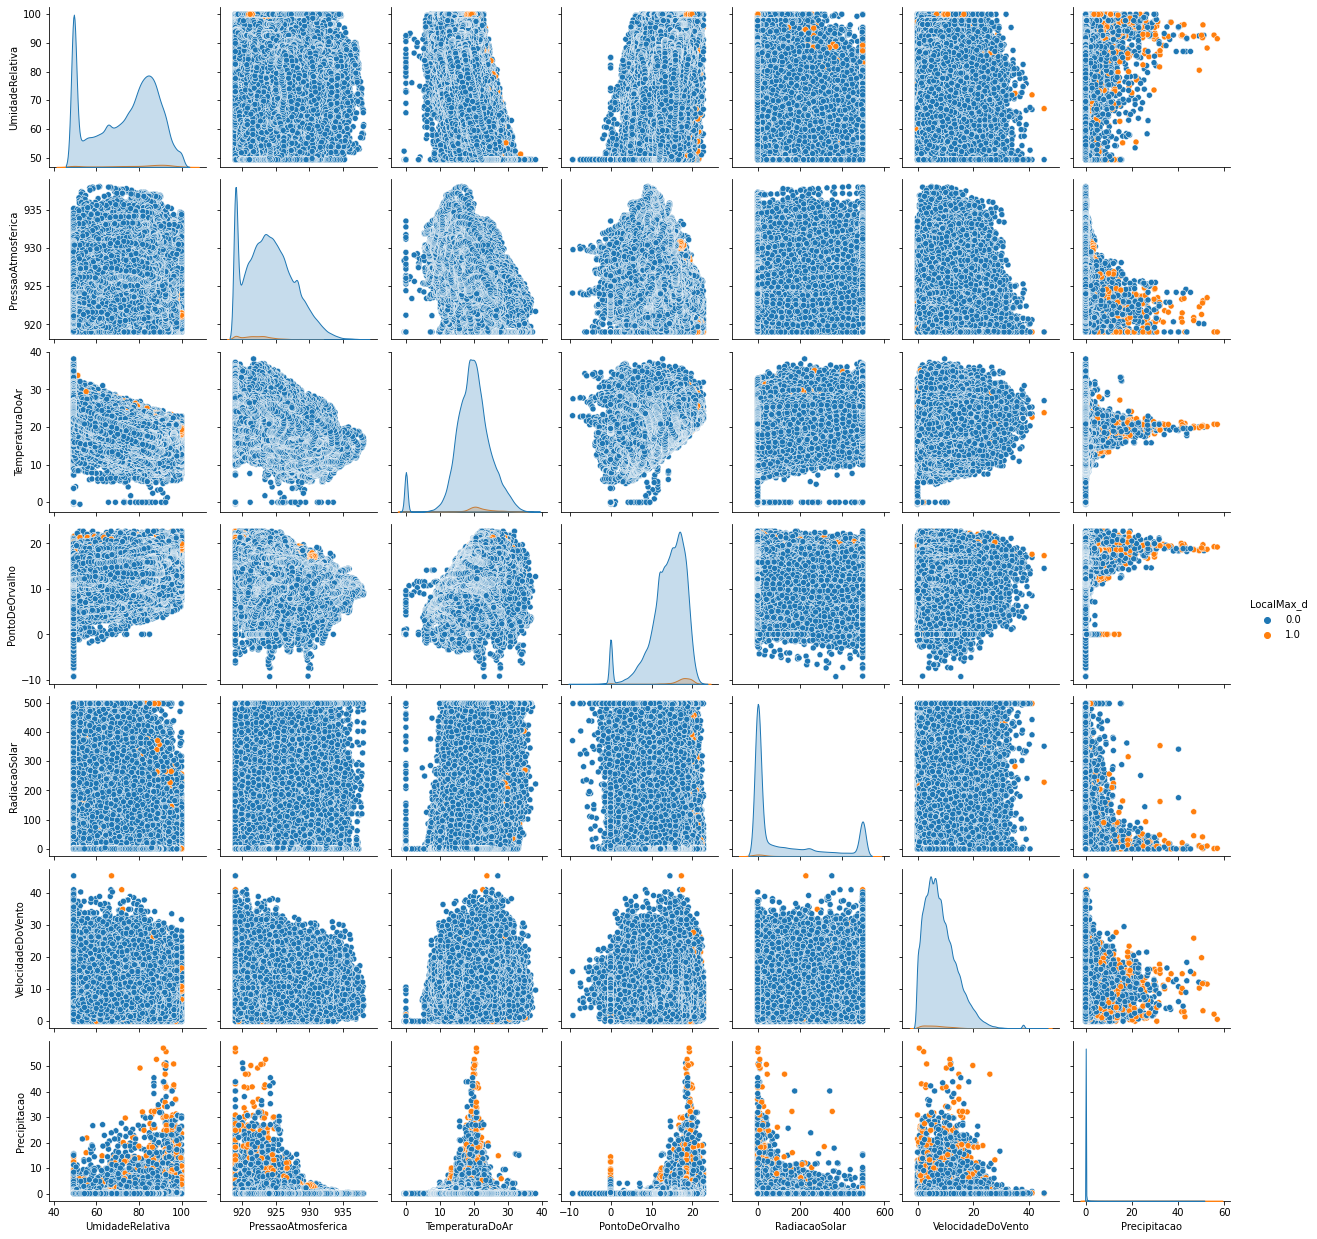

In [80]:
df_aux = df[df['Local'] == 1].copy()
remove_outliers(df_aux)
sns.pairplot(df_aux[columns], hue='LocalMax_d')

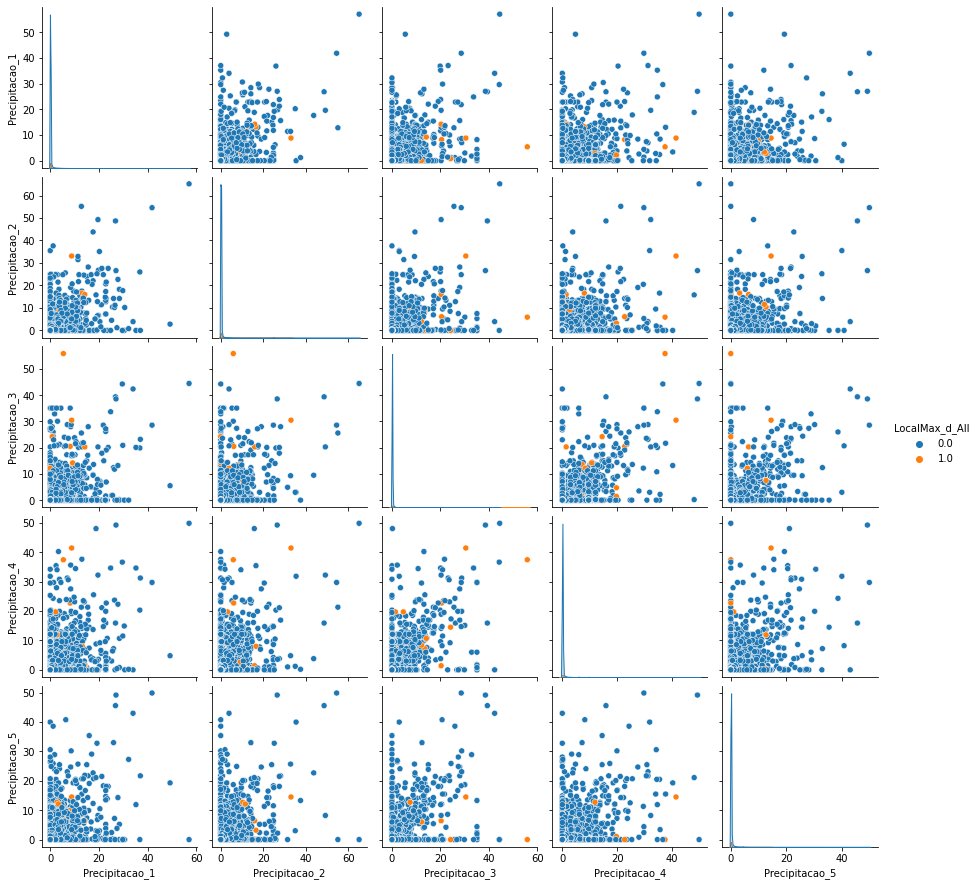

In [105]:
df_aux = pd.DataFrame()
df_aux['LocalMax_d_All'] = df[0:292806:5]['LocalMax_d_All']

for i in range(1, 6):
    df_aux[f'Precipitacao_{i}'] = df.loc[df['Local'] == i, 'Precipitacao'].reset_index(drop=True)

sns.pairplot(df_aux, hue='LocalMax_d_All')

In [55]:
df_aux

,Data_Hora,LocalMax_d_All,LocalMax_d_ow,Local_d_Null,LocalMax_h_All,LocalMax_h_ow,Local_h_Null,Local,UmidadeRelativa,PressaoAtmosferica,...,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao,LocalMax_d,LocalMax_h,Local_d,Local_h,Mes,TempOrval_Diff
1,2011-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4,86.6,926.7,...,0.0,131.0,2.5,0.0,0.0,0.0,0.0,0.0,1,2.3
6,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,4,85.9,926.4,...,0.0,154.0,2.7,0.0,0.0,0.0,0.0,0.0,1,2.5
12,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,4,85.8,926.4,...,0.0,129.0,1.8,0.0,0.0,0.0,0.0,0.0,1,2.4
17,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,4,85.8,926.1,...,0.0,172.0,1.7,0.0,0.0,0.0,0.0,0.0,1,2.5
22,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4,85.5,925.9,...,0.0,166.0,4.2,0.0,0.0,0.0,0.0,0.0,1,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,2011-02-22 04:15:00,0.0,0.0,0.0,0.0,0.0,0.0,4,87.0,929.0,...,0.0,150.0,1.6,0.0,0.0,0.0,0.0,0.0,2,2.2
24982,2011-02-22 04:30:00,0.0,0.0,0.0,0.0,0.0,0.0,4,87.1,929.2,...,0.0,243.0,0.3,0.0,0.0,0.0,0.0,0.0,2,2.2
24988,2011-02-22 04:45:00,0.0,0.0,0.0,0.0,0.0,0.0,4,88.4,929.3,...,0.0,324.0,0.7,0.0,0.0,0.0,0.0,0.0,2,2.0
24994,2011-02-22 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4,86.3,929.3,...,0.0,3.0,0.9,0.0,0.0,0.0,0.0,0.0,2,2.1


# Temperatura do Ar x Ponto de Orvalho

In [13]:
df_aux = df[df['Local'] == 4].copy()
df_aux = df_aux[0:70080]
#remove_outliers(df_aux)

df_aux['Diff_Temp_Orvalho'] = df_aux['TemperaturaDoAr'] - df_aux['PontoDeOrvalho']

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = df_aux['Data_Hora'],
        y = df_aux['Precipitacao'],
        name = 'Precipitacao'
    )
)

fig.add_trace(
    go.Scatter(
        x = df_aux['Data_Hora'],
        y = df_aux['TemperaturaDoAr'],
        name = 'TemperaturaDoAr'
    )
)

fig.add_trace(
    go.Scatter(
        x = df_aux['Data_Hora'],
        y = df_aux['PontoDeOrvalho'],
        name = 'PontoDeOrvalho'
    )
)

fig.add_trace(
    go.Scatter(
        x = df_aux['Data_Hora'],
        y = df_aux['Diff_Temp_Orvalho'],
        name = 'Diff_Temp_Orvalho'
    )
)

fig.add_trace(
    go.Scatter(
        x = df_aux['Data_Hora'],
        y = df_aux['UmidadeRelativa'] - df_aux['UmidadeRelativa'].min(),
        name = 'UmidadeRelativa'
    )
)

fig.add_trace(
    go.Scatter(
        x = df_aux['Data_Hora'],
        y = df_aux['RadiacaoSolar'] / 50,
        name = 'RadiacaoSolar'
    )
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)
fig.update_xaxes(rangeslider_visible=True)


if not os.path.exists("../../../assets"):
    os.mkdir("../../../assets")

fig.write_html('../../../assets/temp_orvalho.html')